In [2]:
import pickle
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
with open("results_1vA_new.pickle", 'rb') as f:
    results = pickle.load(f, encoding='latin1')
    
datasets = list(results.keys())

In [16]:
with open("ds.pickle", 'rb') as f:
    results = pickle.load(f, encoding='latin1')

datasets = list(results.keys())

In [4]:
datasets

['ajt', 'chd', 'corpas', 'yri']

In [6]:
def accuracy(test, pred_type):
    return accuracy_score(results[test]['y_test'],
                          results[test][pred_type])

In [7]:
data = [[accuracy(test, pred_type) for pred_type in ["preds_naive", "preds_ci", "preds_lr", "preds_xgb"]] for test in datasets]

In [9]:
df = pd.DataFrame(data, columns=["No recal", "Confidence intervals", "Logistic regression", "XGBoost"])

In [10]:
df['Trio'] = ['chd', 'ajt', 'corpas', 'yri']

In [11]:
df[['Trio', 'No recal', "Confidence intervals", 'Logistic regression', 'XGBoost']]

,Trio,No recal,Confidence intervals,Logistic regression,XGBoost
0,chd,0.876238,0.968691,0.976908,0.988323
1,ajt,0.893416,0.925826,0.926627,0.943886
2,corpas,0.903017,0.947415,0.950703,0.964683
3,yri,0.875748,0.963026,0.974283,0.982650


In [12]:
accuracy_matrices = {}
for pred_type in ["preds_naive", "preds_lr", "preds_xgb"]:
    accuracies_matrix = []

    for train in datasets:
        accuracies_matrix.append([])
        for test in datasets:
            try:
                accuracies_matrix[-1].append(accuracy(test, pred_type))

            except KeyError:
                accuracies_matrix[-1].append(0)
                
    accuracy_matrices[pred_type] = accuracies_matrix

In [14]:
accuracy_matrices = {}
for pred_type in ["preds_naive", "preds_lr", "preds_xgb"]:
    accuracies_matrix = []

    for train in datasets:
        accuracies_matrix.append([])
        for test in datasets:
            try:
                accuracies_matrix[-1].append(accuracy(test, pred_type))

            except KeyError:
                accuracies_matrix[-1].append(0)
                
    accuracy_matrices[pred_type] = accuracies_matrix

In [15]:
results.keys()

dict_keys(['ajt', 'chd', 'corpas', 'yri'])

In [16]:
contaminations = sorted(list(results['ajt']['idx'].keys()))
pred_types = ['preds_naive',  'preds_ci', 'preds_lr', 'preds_xgb']
pred_names = {'preds_naive': "No recalibration",
              'preds_ci': "Confidence interval",
              'preds_lr': "Logistic regression",
              'preds_xgb': "XGBoost"}

In [17]:
scores = {}

for test in datasets:
    scores[test] = {}
    
    for pred_type in pred_types:
        scores[test][pred_type] = []
        for contamination in contaminations:
            scores[test][pred_type].append(accuracy_score(results[test]['y_test'][results[test]['idx'][contamination]],
                                                          results[test][pred_type][results[test]['idx'][contamination]]))

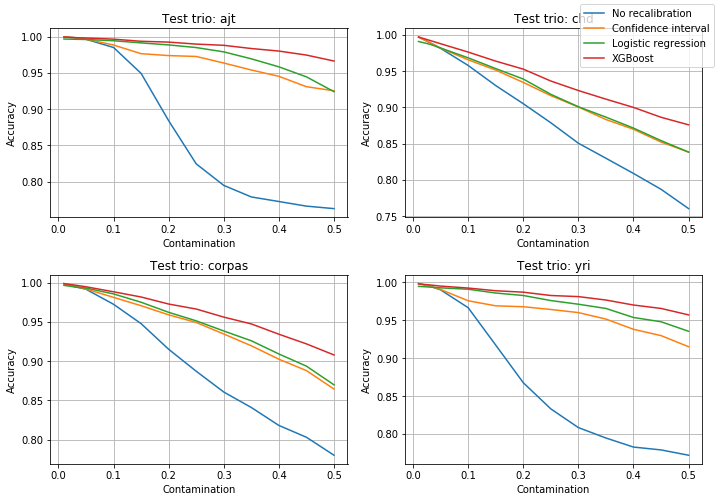

In [18]:
sp, ax = plt.subplots(2, 2, figsize=(10, 7))

for i in range(2):
    for j in range(2):
        test = datasets[2*i + j]
        ax[i,j].set_title("Test trio: {}".format(test))

#         plt.grid()
        for pred_type in pred_types:
            ax[i,j].plot(contaminations, scores[test][pred_type], label=pred_names[pred_type])
        
        
        ax[i,j].grid()
        ax[i, j].set_xlabel("Contamination")
        ax[i, j].set_ylabel("Accuracy")

plt.tight_layout()
handles, labels = ax[1, 1].get_legend_handles_labels()
sp.legend(handles, labels, loc='upper right')
sp.savefig('accuracies.eps', format='eps', dpi=1000)

In [20]:
scores

{'ajt': {'preds_naive': [0.9993827160493827,
   0.9984119982355536,
   0.996235736972121,
   0.9848868724958756,
   0.9491660281723345,
   0.8838690651725155,
   0.8243666213901848,
   0.7946706143597335,
   0.7787511097957975,
   0.7724352331606218,
   0.7660754537904853,
   0.7626453358708257],
  'preds_ci': [0.9993239271017049,
   0.9983825907954712,
   0.9963239618868368,
   0.9883042658496347,
   0.976336417752107,
   0.9737245650250663,
   0.9725093013642001,
   0.9634641006661732,
   0.9538324948209529,
   0.9451073279052553,
   0.9307747063708625,
   0.925183621279253],
  'preds_lr': [0.9965608465608465,
   0.9962358476694604,
   0.9959122456181626,
   0.994196323356116,
   0.9912477161548889,
   0.9884399882040696,
   0.9847930077363728,
   0.9788304959289416,
   0.9692512577685706,
   0.9581939304219097,
   0.9443884209277494,
   0.9239346992179369],
  'preds_xgb': [0.9993239271017049,
   0.9985002205558006,
   0.9979708269615339,
   0.9963763846335141,
   0.9934578888430483,